# Author: **Mostafa Noaman Ahmed**
#### Copyright Mostafa Noaman Ahmed, 2022

**Not for distribution.**

# Enable accessing ***Google Drive*** through colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset and print some information about it

In [2]:
import pandas as pd

data_file = r"/content/drive/MyDrive/Iris.csv"
data = pd.read_csv(data_file)

In [3]:
print(data.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [4]:
print(len(data.columns))

6


In [5]:
print(len(data))

150


In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
X = data.iloc[:,  :5]
y = data.iloc[: , 5:]

In [10]:
X.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2


In [11]:
y.head()

,Species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


# Plot data using ***Elbow Plot*** to know the optimal number of clusters from 1 to 10

In [12]:
from sklearn.cluster import KMeans

In [13]:
ks = []
scores = []
for i in range(1, 11):
    kmeans_i = KMeans(i)
    model_i = kmeans_i.fit(X)
    score = model_i.score(X)
    scores.append(abs(score))
    ks.append(i)

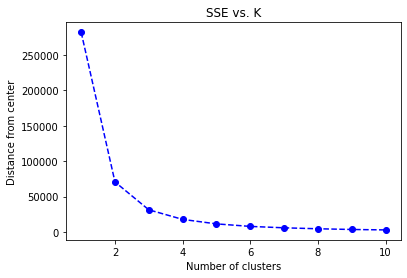

In [14]:
import matplotlib.pyplot as plt

plt.plot(ks, scores, linestyle='--', marker='o', color='b');
plt.xlabel('Number of clusters');
plt.ylabel('Distance from center');
plt.title('SSE vs. K');

The optimal number of clusters according to the plot is 3

# Train the ***KMeans*** model with number of clusters = 3

In [15]:
kmeans_3 = KMeans(3)

# Then fit the model to your data using the fit method
kmeans_3 = kmeans_3.fit(X)

# Finally predict the labels on the same data to show the category that point belongs to
labels_3 = kmeans_3.predict(X)

In [16]:
print(labels_3)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# Plot the dataset before and after clustering (with number of clusters = 3)

In [17]:
from mpl_toolkits.mplot3d import Axes3D

def plotData_3D(df_before_clustering, centroids, labels, title_, name1, name2):
    #axes = Axes3D(fig)
    fig = plt.figure(figsize=(11, 5))
    fig.suptitle(title_, fontsize=16)
    
    ax1 = fig.add_subplot(1, 2, 1, projection='3d')
    ax1.scatter(df_before_clustering.iloc[:, 0], df_before_clustering.iloc[:, 1], alpha=0.5)
    
    ax2 = fig.add_subplot(1, 2, 2, projection='3d')
    ax2.scatter(df_before_clustering.iloc[:, 0], df_before_clustering.iloc[:, 1], c=labels, alpha=0.5,  cmap='tab10')
    ax2.scatter(centroids[:, 0], centroids[:,1], marker="o", s=100, c='r', alpha=1)
    
    ax1.set_title(name1)
    ax2.set_title(name2)
    plt.show()

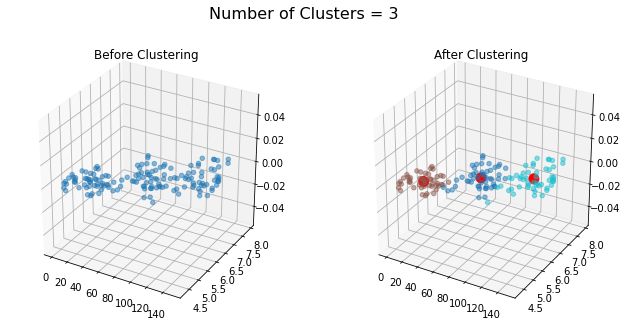

In [18]:
plotData_3D(data, kmeans_3.cluster_centers_, labels_3, 'Number of Clusters = 3', 'Before Clustering', 'After Clustering')

In [19]:
def plot(df_before_clustering, centroids, labels, title_, name1, name2):
    f, axes = plt.subplots(1, 2, figsize=(11, 5))
    f.suptitle(title_, fontsize=16)

    axes[0].scatter(df_before_clustering.iloc[:, 0], df_before_clustering.iloc[:, 1], alpha=0.5)
    axes[1].scatter(df_before_clustering.iloc[:, 0], df_before_clustering.iloc[:, 1], c=labels, alpha=1,  cmap='tab10')
    axes[1].scatter(centroids[:, 0], centroids[:,1], marker="o", s=100, c='r')

    axes[0].set_title(name1)
    axes[1].set_title(name2)
    plt.show()

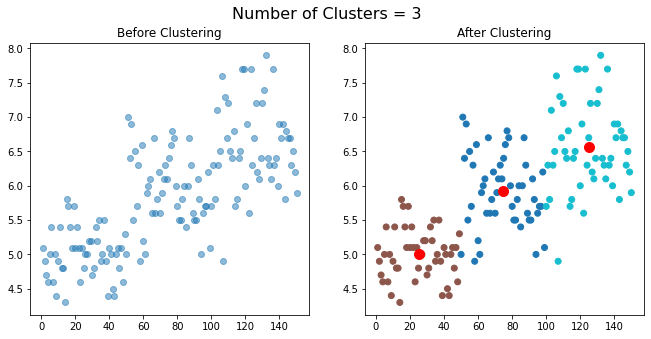

In [20]:
plot(data, kmeans_3.cluster_centers_, labels_3, 'Number of Clusters = 3', 'Before Clustering', 'After Clustering')